In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**train и test**

In [ ]:
train_orig = pd.read_csv('/content/data/train.csv')
test_orig = pd.read_csv('/content/data/test.csv')

In [ ]:
train = train_orig.copy()
test = test_orig.copy()

In [ ]:
print(train.shape)
print(test.shape)

(8693, 14)
(4277, 13)


**Data analysis**

In [ ]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

cols = ['Transported',]

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train[c].values)) 
    train[c] = lbl.transform(list(train[c].values))
    # test[c] = lbl.transform(list(test[c].values))

print('Shape all_data: {}'.format(train.shape))

Shape all_data: (8693, 13)


In [ ]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1


Анализ влияния категориальных признаков

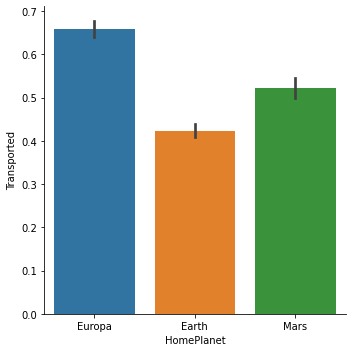

In [ ]:
sns.catplot(x='HomePlanet',
            y='Transported',
            kind='bar',
            data=train);

# вероятность перенестись выше, если ты с Европы или Марса и меньше, если с Земли

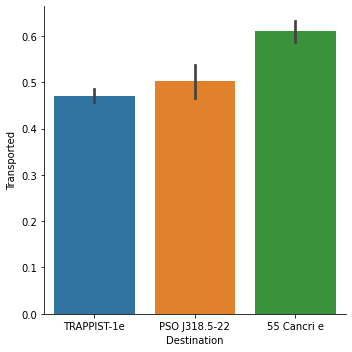

In [ ]:
sns.catplot(x='Destination',
            y='Transported',
            kind='bar',
            data=train);

# вероятность перенестись выше, если пункт назначения 55 Cancri e

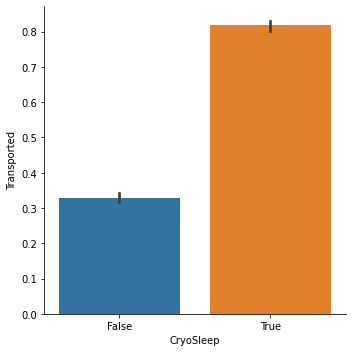

In [ ]:
sns.catplot(x='CryoSleep',
            y='Transported',
            kind='bar',
            data=train);

# вероятность перенестись выше, если пребывал в криосне

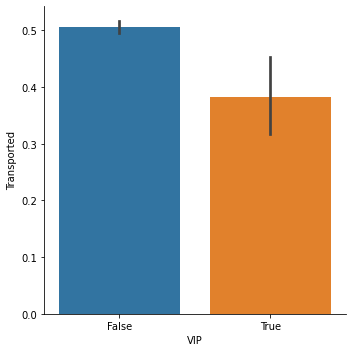

In [ ]:
sns.catplot(x='VIP',
            y='Transported',
            kind='bar',
            data=train);

# вероятность перенестись ниже, если оплатил VIP-обслуживание

Анализ значимости числовых признаков

In [ ]:
# train['cost_of_lux_amn'] = train['RoomService'] + train['FoodCourt'] + train['ShoppingMall'] + train['Spa'] + train['VRDeck']
train['cost_of_lux_amn'] = train['RoomService'] + train['Spa'] + train['VRDeck']

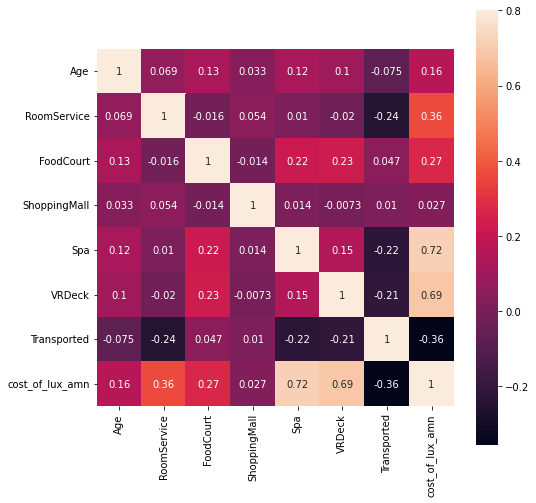

In [ ]:
corrmat = train.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True)

In [ ]:
# RoomService, Spa, VRDeck, cost_of_lux_amn - имеют больше влияния на "перенос", чем другие числовые хар-ки

**Conclusion Data analysis**

1) вероятность перенестись выше, если ты с Европы или Марса и меньше, если с Земли

2) вероятность перенестись выше, если пункт назначения 55 Cancri e

3) вероятность перенестись выше, если пребывал в криосне

4) вероятность перенестись ниже, если оплатил VIP-обслуживание

5) RoomService, Spa, VRDeck, cost_of_lux_amn - имеют больше влияния на "перенос", чем другие числовые хар-ки

**Preprocessing of data**

In [ ]:
train.dtypes

PassengerId         object
HomePlanet          object
CryoSleep           object
Cabin               object
Destination         object
Age                float64
VIP                 object
RoomService        float64
FoodCourt          float64
ShoppingMall       float64
Spa                float64
VRDeck             float64
Transported          int64
cost_of_lux_amn    float64
dtype: object

Удаление колонок.
Процент значений Nan в колонках очень маленький, параметры статистически значимы, поэтому удалять колонки не следует. Заполним строки с Nan значениями.

In [ ]:
train.isnull().mean()

PassengerId        0.000000
HomePlanet         0.023122
CryoSleep          0.024963
Cabin              0.022892
Destination        0.020936
Age                0.020591
VIP                0.023352
RoomService        0.020821
FoodCourt          0.021051
ShoppingMall       0.023927
Spa                0.021051
VRDeck             0.021627
Transported        0.000000
cost_of_lux_amn    0.062579
dtype: float64

In [ ]:
# threshold = 0.4
# data = train[train.columns[train.isnull().mean() < threshold]]

In [ ]:
Y = train['Transported']

In [ ]:
train = train.drop( ['PassengerId', 'FoodCourt', 'ShoppingMall', 'Cabin', 'Transported'], axis=1)
test = test.drop( ['PassengerId', 'FoodCourt', 'ShoppingMall', 'Cabin'], axis=1)

In [ ]:
cols = train.select_dtypes(include='object').columns

In [ ]:
cols

Index(['HomePlanet', 'CryoSleep', 'Destination', 'VIP'], dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

cols = train.select_dtypes(include='object').columns

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train[c].values)) 
    train[c] = lbl.transform(list(train[c].values))
    test[c] = lbl.transform(list(test[c].values))

print('Shape all_data: {}'.format(train.shape))

Shape all_data: (8693, 9)


Заполнение пропусков

In [ ]:
train[['RoomService', 'Spa', 'VRDeck']] = train[['RoomService', 'Spa', 'VRDeck']].fillna (0)
test[['RoomService', 'Spa', 'VRDeck']] = test[['RoomService', 'Spa', 'VRDeck']].fillna (0)

In [ ]:
train['cost_of_lux_amn'] = train['RoomService'] + train['Spa'] + train['VRDeck']
test['cost_of_lux_amn'] = test['RoomService'] + test['Spa'] + test['VRDeck']

In [ ]:
# train[train.isnull().any(1)].head()

In [ ]:
train.isnull().sum()

HomePlanet           0
CryoSleep            0
Destination          0
Age                179
VIP                  0
RoomService          0
Spa                  0
VRDeck               0
cost_of_lux_amn      0
dtype: int64

In [ ]:
data = [train, test]
for dataset in data:
    mean = train["Age"].mean()
    std = test["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train["Age"].astype(int)

In [ ]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,Spa,VRDeck,cost_of_lux_amn
0,1,0,2,39,0,0.0,0.0,0.0,0.0
1,0,0,2,24,0,109.0,549.0,44.0,702.0
2,1,0,2,58,1,43.0,6715.0,49.0,6807.0
3,1,0,2,33,0,0.0,3329.0,193.0,3522.0
4,0,0,2,16,0,303.0,565.0,2.0,870.0


Scaler

In [ ]:
sc = StandardScaler() 

In [ ]:
var_transform = ['RoomService', 'Age', 'Spa', 'VRDeck', 'cost_of_lux_amn']
train[var_transform] = sc.fit_transform(train[var_transform])
test[var_transform] = sc.transform(test[var_transform])
print(train.head())


   HomePlanet  CryoSleep  Destination       Age  VIP  RoomService       Spa  \
0           1          0            2  0.707831    0    -0.333105 -0.270626   
1           0          0            2 -0.334444    0    -0.168073  0.217158   
2           1          0            2  2.028046    1    -0.268001  5.695623   
3           1          0            2  0.290921    0    -0.333105  2.687176   
4           0          0            2 -0.890324    0     0.125652  0.231374   

     VRDeck  cost_of_lux_amn  
0 -0.263003        -0.449452  
1 -0.224205        -0.066015  
2 -0.219796         3.268580  
3 -0.092818         1.474290  
4 -0.261240         0.025748  


#**training model and predicting**

In [ ]:
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBRFClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# model = XGBClassifier(n_estimators=3200)
model = XGBRFClassifier(n_estimators=3200)

In [ ]:
# model = RandomForestClassifier(n_estimators=1000, max_depth=3, random_state=2)

In [ ]:
model.fit(train, Y)
predictions = model.predict(test)
# predictions = model.predict(train)

In [ ]:
# accuracy_score(Y, predictions)

#**Staking**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
KNC = KNeighborsClassifier()
NB = GaussianNB()			

In [ ]:
model_kNeighborsClassifier = KNC.fit(train, Y) 
pred_knc = model_kNeighborsClassifier.predict(test) 

In [ ]:
# accuracy_score(Y, pred_knc)

In [ ]:
model_NaiveBayes = NB.fit(train, Y)
pred_nb = model_NaiveBayes.predict(test)

In [ ]:
# accuracy_score(Y, pred_nb)

In [ ]:
lr = LogisticRegression() # meta-classifier
clf_stack = StackingClassifier(classifiers =[KNC, NB], meta_classifier = lr, use_probas = True, use_features_in_secondary = True)

In [ ]:
model_stack = clf_stack.fit(train, Y) 
pred_stack = model_stack.predict(test)	


In [ ]:
# accuracy_score(Y, pred_stack)

**Submission file**

In [ ]:

lbl = LabelEncoder() 
lbl.fit(list(train_orig['Transported'].values)) 
predictions_inverse = lbl.inverse_transform(predictions)

In [ ]:
output = pd.DataFrame({'PassengerId': test_orig['PassengerId'], 'Transported': predictions_inverse})
output.to_csv('submission.csv', index=False)